## This needs to be updated to include enclosing convex hull for (hcn4, vasc) density!!!

## Analyze the output of the hcn1 edt

The hcn1 edt gives us the distance of each pixel in the hcn1 mask to the nearest vascular mask pixel (in um)


In [119]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.optimize import curve_fit # todo: switch this to scipy.optimize.curve_fit

import tifffile

from IPython.display import display # to display pandas df

## Utility functions

In [120]:
gNumBins = 100

# remember to use this when making matplotlib subplots
# constrained_layout=True

## Make plots on black background (for slides)
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

def myLabelSize(g, myFontSize=22):
    """
    g: return of seaborn plot function
    """
    g.set_xlabel(g.get_xlabel(), size = myFontSize)
    g.set_ylabel(g.get_ylabel(), size = myFontSize)
    #
    g.set_xticklabels(g.get_xticks(), size = myFontSize)
    g.set_yticklabels(g.get_yticks(), size = myFontSize)

    # yticklabels were sometimes blowing up into 1.000000000001
    ylabels = [str(round(y,2)) for y in g.get_yticks().tolist()] # used below
    print('ylabels:', ylabels)
    g.set_yticklabels(ylabels, size = myFontSize) # using from above

def printStackInfo(name, localData):
    flatStack = np.ravel(localData[~np.isnan(localData)])
    mean = np.nanmean(flatStack)
    std = np.nanstd(flatStack)
    cv = std/mean
    pcv = cv * 100 # cv as a percentage
    #cv2 = scipy.stats.variation(flatStack)
    #kurtosis = scipy.stats.kurtosis(flatStack)
    #skew = scipy.stats.skew(flatStack)

    print(name, 
          stackData.shape, 
          stackData.dtype, 
          'min:', np.nanmin(stackData), 
          'max:', np.nanmax(stackData), 
          'mean:', round(mean,2),
          'std:', round(std,2),
          'CV:',round(cv,2),
          'pCV:',round(pcv,2),
          #'kurtosis:', kurtosis,
          #'skew:', skew,
         )
    
def myLegend(g):
    # inside plot
    #g.legend()
    # outside plot
    g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    
    plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title



## Load hcn1 edt

In [121]:
# load a list

myLegendList = [
    'head',
    'mid',
    'distalHead',
]

pathList = [
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_HEAD__ch1_9_edt.tif',
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_MID__ch1_9_edt.tif',
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_distalHEAD__ch1_9_edt.tif',
]

stackDataList = []
for path in pathList:
    stackData = tifffile.imread(path)

    filename = os.path.basename(path)
    printStackInfo(filename, stackData)

    stackDataList.append(stackData)
    


20200420_HEAD__ch1_9_edt.tif (36, 1024, 1024) float32 min: 0.0 max: 75.18001 mean: 8.93 std: 11.91 CV: 1.33 pCV: 133.4
20200420_MID__ch1_9_edt.tif (23, 1024, 1024) float32 min: 0.0 max: 70.23193 mean: 10.07 std: 10.32 CV: 1.02 pCV: 102.47
20200420_distalHEAD__ch1_9_edt.tif (26, 1024, 1024) float32 min: 0.0 max: 49.71332 mean: 11.91 std: 10.06 CV: 0.84 pCV: 84.48


## Plot raw edt distances as a histogram 

We are doing this to show that 'really short' distances contaminate the measurement. These are pixels in hcn1 mask that are super close to a vessel. Usually <= 1 um. In this dataset there are some 200,000 of them.

head (36, 1024, 1024) float32 min: 0.0 max: 75.18001 mean: 8.93 std: 11.91 CV: 1.33 pCV: 133.4
mid (23, 1024, 1024) float32 min: 0.0 max: 70.23193 mean: 10.07 std: 10.32 CV: 1.02 pCV: 102.47
distalHead (26, 1024, 1024) float32 min: 0.0 max: 49.71332 mean: 11.91 std: 10.06 CV: 0.84 pCV: 84.48


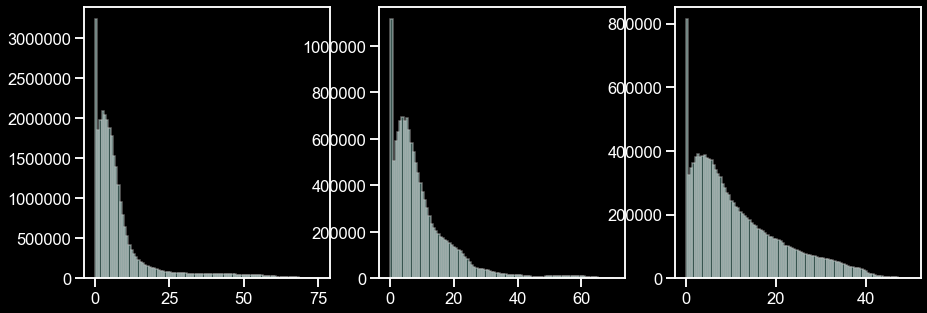

In [122]:
fig, axs = plt.subplots(1, 3, sharey=False, figsize=(15,5))


# 0
ax = axs[0]
stackData = stackDataList[0]
printStackInfo(myLegendList[0], stackData)
g = sns.distplot(stackData, bins=gNumBins, hist=True, kde=False, norm_hist=False, ax=ax)

# 1
ax = axs[1]
stackData = stackDataList[1]
printStackInfo(myLegendList[1], stackData)
g = sns.distplot(stackData, bins=gNumBins, hist=True, kde=False, norm_hist=False, ax=ax)

# 2
ax = axs[2]
stackData = stackDataList[2]
printStackInfo(myLegendList[2], stackData)
g = sns.distplot(stackData, bins=gNumBins, hist=True, kde=False, norm_hist=False, ax=ax)



## Remove really short distances

Rational is these are right up again a vessel and there are LOTS of them


removing distances <= 1


/Users/cudmore/Sites/bImPy/bImPy_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """


head (36, 1024, 1024) float32 min: 1.0015583 max: 75.18001 mean: 10.25 std: 12.26 CV: 1.2 pCV: 119.68
mid (23, 1024, 1024) float32 min: 1.0111758 max: 70.23193 mean: 11.11 std: 10.32 CV: 0.93 pCV: 92.91
distalHead (26, 1024, 1024) float32 min: 1.0111758 max: 49.71332 mean: 13.0 std: 9.84 CV: 0.76 pCV: 75.71


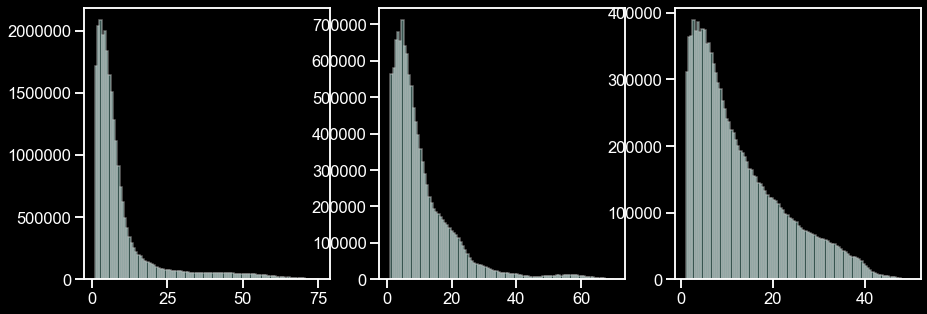

In [123]:
# remove really short distances
removeLessThanUm = 1
print('removing distances <=', removeLessThanUm)
for idx, stackData in enumerate(stackDataList):
    stackData[stackData<=removeLessThanUm] = np.nan # this will give a warning but seems ok
    
    filename = os.path.basename(pathList[idx])
    printStackInfo(myLegendList[idx], stackData)

#
# plot again
fig, axs = plt.subplots(1, 3, sharey=False, figsize=(15,5))
# 0
ax = axs[0]
stackData = stackDataList[0]
#printStackInfo('original', stackData)
g = sns.distplot(stackData, bins=gNumBins, hist=True, kde=False, norm_hist=False, ax=ax)

# 1
ax = axs[1]
stackData = stackDataList[1]
#printStackInfo('original', stackData)
g = sns.distplot(stackData, bins=gNumBins, hist=True, kde=False, norm_hist=False, ax=ax)

# 2
ax = axs[2]
stackData = stackDataList[2]
#printStackInfo('original', stackData)
g = sns.distplot(stackData, bins=gNumBins, hist=True, kde=False, norm_hist=False, ax=ax)


 ## Plot hcn1 edt histogram and cumulative histogram

This is the distribution of distances (um) from each pixel in hcn1 mask to closest vascular mask.

Looking at this tells me there may be a difference between (distalHead, head, mid) but we simply need more images to get an average !!!

In [124]:
myLegendList

['head', 'mid', 'distalHead']

ylabels: ['0.0', '0.02', '0.04', '0.06', '0.08', '0.1', '0.12']
ylabels: ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2']


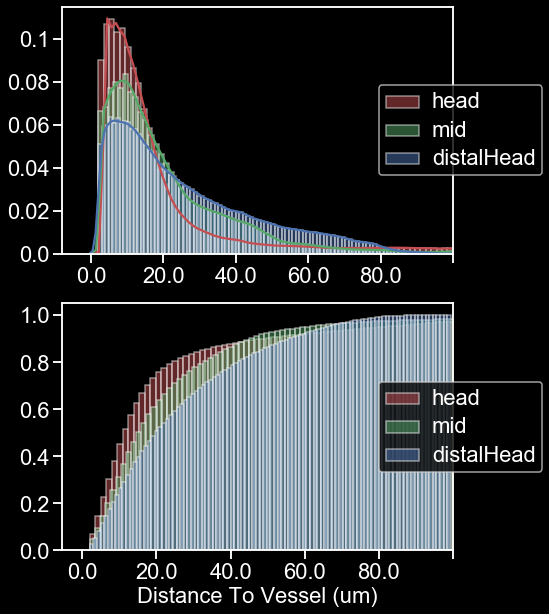

In [125]:

fig, axs = plt.subplots(2, 1, sharey=False, figsize=(7,10))

hist = True
kde = True # kde: Whether to plot a gaussian kernel density estimate (if True ... VERY SLOW)
norm_hist = True

hist_kws = {
    'alpha':0.5, # set to 1 so colors do not 'sum'
    'cumulative':False
}
colorList = ['r', 'g', 'b']

# histogram
ax = axs[0]
for idx, stackData in enumerate(stackDataList):
    color = colorList[idx]
    label = myLegendList[idx]
    g = sns.distplot(stackData, bins=gNumBins, hist=hist, kde=kde, norm_hist=norm_hist,
                     hist_kws=hist_kws, color=color, label=label, ax=ax)

#print('type(g):', type(g))
myLabelSize(g)
g.set(xlim=(None, 50))
#g.set(xlabel='Distance To Vessel (um)')
myLegend(g)

# cumulative
kde = False
hist_kws = {
    'alpha':0.5, # set to 1 so colors do not 'sum'
    'cumulative':True
}

ax = axs[1]
for idx, stackData in enumerate(stackDataList):
    color = colorList[idx]
    label = myLegendList[idx]
    g = sns.distplot(stackData, hist=hist, norm_hist=norm_hist,
                     bins=gNumBins,
                     kde=False,
                     hist_kws=hist_kws, color=color, label=label, ax=ax)

myLabelSize(g)
g.set(xlim=(None, 50))
g.set(xlabel='Distance To Vessel (um)')
myLegend(g)



## Fit the data to a single exponental

Conclude the fit to a single exponential is not proper.

This is just for one stack, use stackDataList[0], stackDataList[1], stackDataList[2]

mu=1.0015583038330078, tau=9.2456693649292


Text(0, 0.5, 'Frequency')

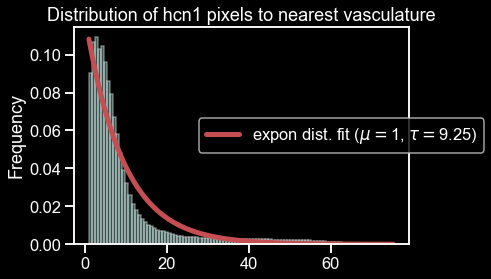

In [126]:

stackData = stackDataList[0]
stackData = stackData[~np.isnan(stackData)] # I am using np.nan to remove smaller than 2 um
stackData = np.ravel(stackData)

# for expon fit, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon

# see: https://stackoverflow.com/questions/31413934/howto-get-fit-parameters-from-seaborn-distplot-fit
# could use 'fit=scipy.stats.expon' but I don't like how it looks
ax = sns.distplot(stackData, bins=gNumBins, norm_hist=True, kde=False);
plt.title('Distribution of hcn1 pixels to nearest vasculature')

# Get the fitted parameters used by sns
(mu, tau) = scipy.stats.expon.fit(stackData, loc=1, scale=1) #expon.fit(x, loc, scale)
print("mu={0}, tau={1}".format(mu, tau))

# to plot the fit
xStart = np.min(stackData)
xStop = np.max(stackData)
xFit = np.linspace(xStart, xStop, 100)
yFit = scipy.stats.expon.pdf(xFit, mu, tau) # expon.pdf(x, loc, scale)
ax.plot(xFit, yFit, 'r-', lw=5)
        
# Legend and labels 
legendList = ["expon dist. fit ($\mu=${0:.2g}, $\\tau=${1:.2f})".format(mu, tau)]
plt.legend(legendList, loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylabel('Frequency')

## Fit all three histograms with a single exponential

Conclude that single exponential does not do the job...

Note: The single exponential does show increasing length of tail from head -> mid -> distalHead

mu=1.0015583038330078, tau=9.2456693649292
mu=1.0111757516860962, tau=10.0971040725708
mu=1.0111757516860962, tau=11.988798141479492
ylabels: ['0.0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09']


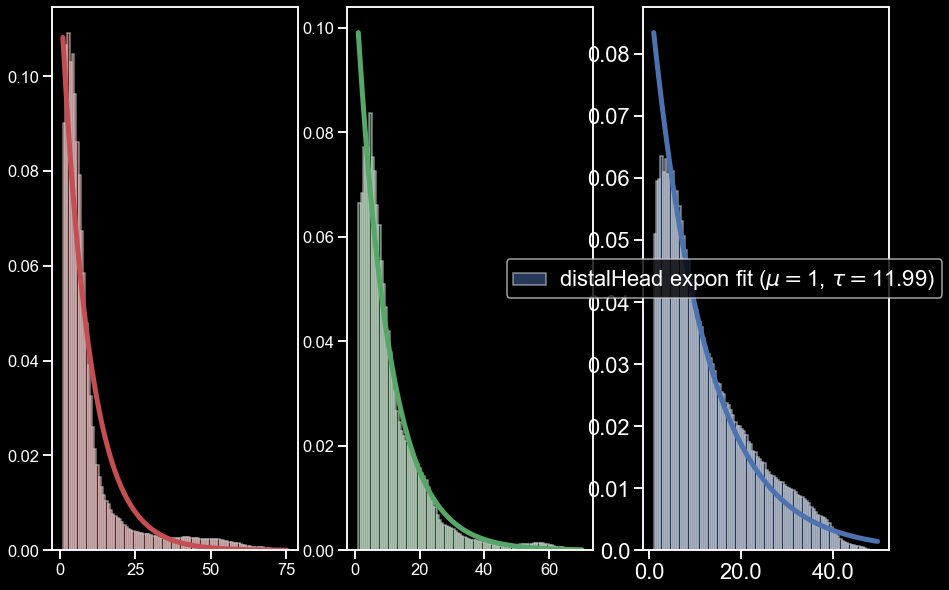

In [127]:
fig, axs = plt.subplots(1, 3, sharey=False, figsize=(15,10))

hist = True
kde = False # kde: Whether to plot a gaussian kernel density estimate (if True ... VERY SLOW)
norm_hist = True

hist_kws = {
    'alpha':0.5, # set to 1 so colors do not 'sum'
    'cumulative':False
}
colorList = ['r', 'g', 'b']

for idx, stackData in enumerate(stackDataList):
    ax = axs[idx]
    stackData = stackData[~np.isnan(stackData)]
    color = colorList[idx]
    label = myLegendList[idx]
 
    # Get the fitted parameters 
    (mu, tau) = scipy.stats.expon.fit(stackData, loc=1, scale=1) #expon.fit(x, loc, scale)
    print("mu={0}, tau={1}".format(mu, tau))

    
    thisLabel = label + " expon fit ($\mu=${0:.2g}, $\\tau=${1:.2f})".format(mu, tau)
    g = sns.distplot(stackData, bins=gNumBins, hist=hist, kde=kde, norm_hist=norm_hist,
                     hist_kws=hist_kws, color=color, label=thisLabel, ax=ax)

    # to plot the fit
    xStart = np.min(stackData)
    xStop = np.max(stackData)
    xFit = np.linspace(xStart, xStop, 100)
    yFit = scipy.stats.expon.pdf(xFit, mu, tau) # expon.pdf(x, loc, scale)
    fitColor = color + '-'
    ax.plot(xFit, yFit, fitColor, lw=5)


myLabelSize(g)
#g.set(xlim=(None, 50))
#g.set(xlabel='Distance To Vessel (um)')
myLegend(g)


## Testing singe/double exponential and gaussian fits

Conclude gaussian might be best?

poptGaus: [  0.13308714 -28.8483907   25.2681361 ]
residuals fres: 0.581027109102556


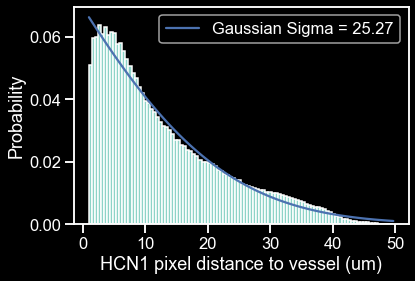

In [128]:
stackData = stackDataList[2]
stackData = stackData[~np.isnan(stackData)] # I am using np.nan to remove smaller than 2 um
stackData = np.ravel(stackData)

#myBins = 100

counts, bins, bars = plt.hist(stackData, bins=gNumBins, density=True)

xStart = np.min(bins)
xStop = np.max(bins)
x = np.linspace(xStart, xStop, gNumBins)

def myDoubleExpFit(x, a, b, c):
    y = a * np.exp(-b * x) + (1-a)*np.exp(-c*x)
    return y

def mySingleExpFit(x, a, b):
    y = a * np.exp(-b * x)
    return y

def myGaussianFit(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# exponential decay with a gaussian
#def myGaussianFit0(x, A, beta, B, mu, sigma):
#    return (A * np.exp(-x/beta) + B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

y = counts

# give the initial parameters for a,b,c then curve_fit iterates over them to find the best fit
'''popt, pcov = curve_fit(myDoubleExpFit,x,y,p0=(1.0,1.0,1.0))
print('popt:', popt) # best fit parameters

p1 = popt[0] # a
p2 = popt[1] # b
p3 = popt[2] # c

popt1, pcov1 = curve_fit(mySingleExpFit,x,y,p0=(1.0,1.0))
print('popt1:', popt1) # best fit parameters
p1_1 = popt1[0] # a
p2_1 = popt1[1] # b
'''

# gaussian
# weighted arithmetic mean
gMean = sum(x * y) / sum(y)
gSigma = np.sqrt(sum(y * (x - gMean)**2) / sum(y))
#print('initial gaussian gMean:', gMean, 'gSigma:', gSigma)
poptGaus, pcovGaus = curve_fit(myGaussianFit,x,y,p0=(max(y), gMean, gSigma)) # max(y), mean, sigma
print('poptGaus:', poptGaus) # best fit parameters
gaus1 = poptGaus[0] # a
gaus2 = poptGaus[1] # x0
gaus3 = poptGaus[2] # sigma

fitSigma = poptGaus[2]

residuals = y - myGaussianFit(x,gaus1,gaus2,gaus2)
fres = sum( (residuals**2)/myGaussianFit(x,gaus1,gaus2,gaus3) ) # chi-sqaure of fit
print('residuals fres:', fres)

#curvey = myDoubleExpFit(x,p1,p2,p3) # y axis fit-line
#curvey1 = mySingleExpFit(x,p1_1,p2_1) # y axis fit-line
curveyGauss = myGaussianFit(x,gaus1, gaus2, gaus3)

#plt.plot(x, curvey, 'r', lw=5, label='Double Exp')
#plt.plot(x, curvey1, 'g', label='Single Exp')
label = 'Gaussian Sigma = {0:.2f}'.format(fitSigma)
plt.plot(x, curveyGauss, 'b', label=label)
plt.legend(loc='best')
plt.xlabel('HCN1 pixel distance to vessel (um)')
plt.ylabel('Probability')
plt.show()

## Fit head/mid/distalHead to a gaussian and plot histograms with fit

head sigma: 5.165357908250069
ylabels: ['0.0', '0.05', '0.1', '0.15']
mid sigma: 11.37166850634543
ylabels: ['0.0', '0.03', '0.05', '0.08', '0.1']
distalHead sigma: 25.268136097318123
ylabels: ['0.0', '0.02', '0.04', '0.06', '0.08']


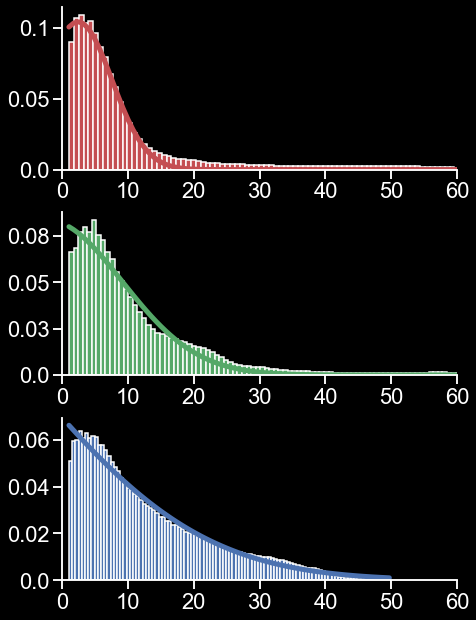

In [129]:
def myGaussianFit(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

fig, axs = plt.subplots(3, 1, sharey=False, figsize=(6.5,8.5), constrained_layout=True)

myBins = 100
hist = True
kde = False # kde: Whether to plot a gaussian kernel density estimate (if True ... VERY SLOW)
norm_hist = True

hist_kws = {
    'alpha':0.5, # set to 1 so colors do not 'sum'
    'cumulative':False
}
colorList = ['r', 'g', 'b']

# histogram
for idx, stackData in enumerate(stackDataList):
    ax = axs[idx]
    
    stackData = stackData[~np.isnan(stackData)]
    color = colorList[idx]
    label = myLegendList[idx]
 
    # plot histogram
    counts, bins, bars = ax.hist(stackData, bins=myBins, density=True, color=color)
    
    xStart = np.min(bins)
    xStop = np.max(bins)
    x = np.linspace(xStart,xStop,myBins) # Example data
    y = counts
    # weighted arithmetic mean
    gMean = sum(x * y) / sum(y)
    gSigma = np.sqrt(sum(y * (x - gMean)**2) / sum(y))
    #print('initial gaussian gMean:', gMean, 'gSigma:', gSigma)
    #poptGaus, pcovGaus = curve_fit(myGaussianFit,x,y,p0=(1.0,1.0,1.0)) # max(y), mean, sigma
    poptGaus, pcovGaus = curve_fit(myGaussianFit,x,y,p0=(max(y), gMean, gSigma)) # max(y), mean, sigma
    #print('poptGaus:', poptGaus) # best fit parameters
    gaus1 = poptGaus[0] # a
    gaus2 = poptGaus[1] # x0
    gaus3 = poptGaus[2] # sigma

    print(label, 'sigma:', gaus3)
    
    # to plot the fit
    xFit = x
    yFit = myGaussianFit(x,gaus1, gaus2, gaus3)

    # plot the fit
    fitColor = color + '-'
    ax.plot(xFit, yFit, fitColor, lw=5)
    
    ax.set_xlim(0,60) # so each plot looks same

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    myLabelSize(ax)

    # set x tick labels to integer
    xlabels = [str(int(x)) for x in ax.get_xticks().tolist()] # used below
    ax.set_xticklabels(xlabels) # using from above



## Statistical test to ask if there is a difference between means

To a first approximation (need to improve stat test), this tells us the population mean of distances is highly significant between groups (head, mid, distalHead)

Now using more proper mannwhitneyu ... IT IS SUPER SLOW

In [33]:
print('myLegendList:', myLegendList)

# go through once to print stats
for i, iLegend in enumerate(myLegendList):
    printStackInfo(iLegend, stackDataList[i])

print('mannwhitneyu is SLOW ... please wait ...')
for i, iLegend in enumerate(myLegendList):
    a = stackDataList[i].copy()
    a = np.ravel(a)
    a = a[~np.isnan(a)]
    #printStackInfo(iLegend, a)
    for j, jLegend in enumerate(myLegendList):
        if j<=i:
            continue
        b = stackDataList[j].copy()
        b = np.ravel(b)
        b = b[~np.isnan(b)]
        
        # independent t-test
        #tmpStat, p = scipy.stats.ttest_ind(a, b, equal_var=True, nan_policy='omit')
        
        # mann witney (SUPER SLOW)
        #alternative = {None, ‘two-sided’, ‘less’, ‘greater’} don't use None
        #print('. mannwhitneyu ... please wait ...')
        tmpStat, p = scipy.stats.mannwhitneyu(a, b, alternative='two-sided')
        
        print('. ', iLegend, 'vs', jLegend, 'tmpStat:', tmpStat, 'p:', p)
print('done')

myLegendList: ['head', 'mid', 'distalHead']
head (12540357,) float32 min: 1.0111758 max: 49.71332 mean: 10.25 std: 12.26 CV: 1.2 pCV: 119.68
mid (12540357,) float32 min: 1.0111758 max: 49.71332 mean: 11.11 std: 10.32 CV: 0.93 pCV: 92.91
distalHead (12540357,) float32 min: 1.0111758 max: 49.71332 mean: 13.0 std: 9.84 CV: 0.76 pCV: 75.71
mannwhitneyu is SLOW ... please wait ...
.  head vs mid tmpStat: 133681028361641.0 p: 0.0
.  head vs distalHead tmpStat: 118232779756260.0 p: 0.0
.  mid vs distalHead tmpStat: 66496670401863.5 p: 0.0
done


myLegendList: ['head', 'mid', 'distalHead']
head (12540357,) float32 min: 1.0111758 max: 49.71332 mean: 10.25 std: 12.26 CV: 1.2 pCV: 119.68
mid (12540357,) float32 min: 1.0111758 max: 49.71332 mean: 11.11 std: 10.32 CV: 0.93 pCV: 92.91
distalHead (12540357,) float32 min: 1.0111758 max: 49.71332 mean: 13.0 std: 9.84 CV: 0.76 pCV: 75.71


(2, 17)

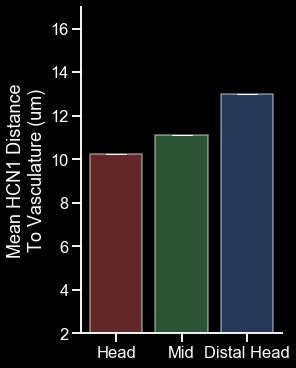

In [91]:
print('myLegendList:', myLegendList)

myLegendList2 = ['Head', 'Mid', 'Distal Head']

meanDistList = []
stdDistList = []
semDistList = []
# go through once to print stats
for i, iLegend in enumerate(myLegendList):
    printStackInfo(iLegend, stackDataList[i])
    a = stackDataList[i].copy()
    a = np.ravel(a)
    a = a[~np.isnan(a)]

    myMean = np.mean(a)
    myStd = np.std(a)
    mySem = scipy.stats.sem(a)
    
    meanDistList.append(myMean)
    stdDistList.append(myStd)
    semDistList.append(mySem)

x_pos = [1,2,3]

myColors = ['r', 'g', 'b']

# Build the plot
#fig, ax = plt.subplots()
fig, ax = plt.subplots(1, 1, figsize=(4,5), constrained_layout=True)
ax.bar(x_pos, meanDistList,
       yerr=semDistList,
       align='center',
       alpha=0.5,
       ecolor='white',
       capsize=10,
       color=myColors)
ax.set_ylabel('Mean HCN1 Distance\nTo Vasculature (um)')
ax.set_xticks(x_pos)
ax.set_xticklabels(myLegendList2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#myLabelSize(ax)
#ax.set_xticklabels(myLegendList2)

ax.set_ylim(2,17)
#ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
#ax.yaxis.grid(True)


## See how well the density of vessels predict the distribution (sigma) of HCN1 distance to a vessel

As the density of vessels increase, the distance of hcn1 to a vessel (sigma) should decrease

This simple analysis indicates to me that we do not need to use a gaussian fit to get sigma but instead just use the mean distance to vessels.

Most importantly is the 3rd plot, showing that (or hinting that) gaussian sigma versus mean distance is linear.


hcnNorm: 78.49698331620958
hcnNorm: 56.33424675982931
hcnNorm: 50.298056235680214


/Users/cudmore/Sites/bImPy/bImPy_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


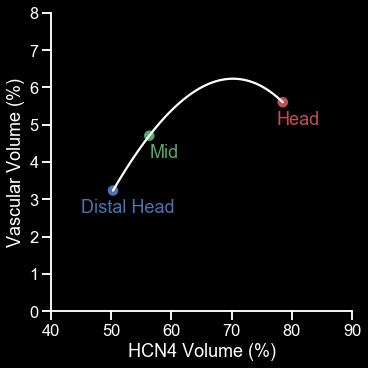

In [151]:
# try loading from _results.csv
dfList = []
headResults = '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_HEAD__results.csv'
dfHead = pd.read_csv(headResults)
#print('dfHead')
#display(dfHead)
dfList.append(dfHead)

midResults = '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_MID__results.csv'
dfMid = pd.read_csv(midResults)
#print('dfMid')
#display(dfMid)
dfList.append(dfMid)

distalHeadResults = '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_distalHEAD__results.csv'
dfDistalHead = pd.read_csv(distalHeadResults)
#print('dfDistalHead')
#display(dfDistalHead)
dfList.append(dfDistalHead)

hcnChan = 0
vascChan = 1

hcnNormVol = [] # list of (head, mid, distalHead)
vascNormVol = []

for df in dfList:
    # 1
    stackVol = df['vStack'].iloc[hcnChan]
    hcnVol = df['vMask'].iloc[hcnChan]
    hcnNorm = hcnVol / stackVol * 100
    print('hcnNorm:', hcnNorm)
    hcnNormVol.append(hcnNorm)
    # 2
    stackVol = df['vStack'].iloc[vascChan]
    vascVol = df['vMask'].iloc[vascChan]
    vascNorm = vascVol / stackVol * 100
    vascNormVol.append(vascNorm)

finalColorList = ['r', 'g', 'b']
myLegendList2 = ['Head', 'Mid', 'Distal Head']

fig, axs = plt.subplots(1, 1, sharey=False, figsize=(5,5), constrained_layout=True)

axs = [axs]

axs[0].scatter(hcnNormVol, vascNormVol, c=finalColorList)
axs[0].set_xlim(40,90)
axs[0].set_ylim(0, 8)
axs[0].set_xlabel('HCN4 Volume (%)')
axs[0].set_ylabel('Vascular Volume (%)')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

# polynomial fit
#np.random.seed(12)

#x = np.linspace(0, 1, 20)
#y = np.cos(x) + 0.3*np.random.rand(20)
x = hcnNormVol
y = vascNormVol
p = np.poly1d(np.polyfit(x, y, 3))

xMin = np.min(x)
xMax = np.max(x)
t = np.linspace(xMin, xMax, 200)
#axs[0].plot(x, y, 'o', t, p(t), '-')
axs[0].plot(t, p(t), '-w')

# this is overly complicated for what it is
# just adding to first plot
# add annotations to points based on myLegendList
for idx, (x,y) in enumerate(zip(hcnNormVol,vascNormVol)):
    #label = "{:.2f}".format(y)
    label = myLegendList2[idx]
    # this method is called for each point
    axs[0].annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(15,-22), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color=finalColorList[idx]
                ) 


myLegendList: ['head', 'mid', 'distalHead']
vNormMaskList: [5.603120061526162, 4.707257642186, 3.236671595637509]
mySigmaList: [5.16530566, 11.37165487, 25.26813799]
myMeanDistList: [10.25, 11.11, 13.0]


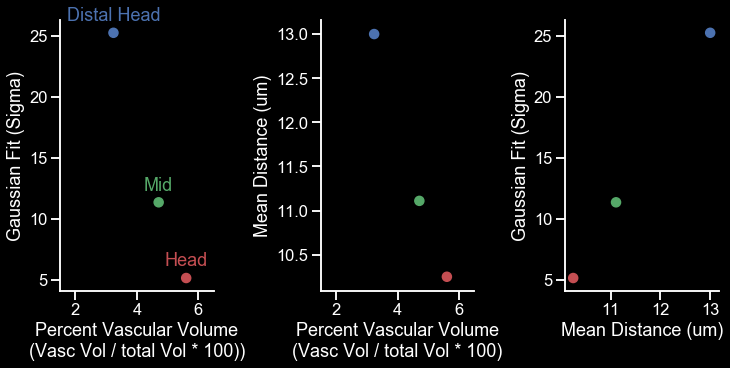

In [94]:
finalColorList = ['r', 'g', 'b']
myLegendList2 = ['Head', 'Mid', 'Distal Head']

# from _results.csv
vHead = 91905.20701 # volume of ch2 vascular mask
vHeadStack = 1640250.539 # volume of whole stack
vNormHead = vHead / vHeadStack * 100 # volume of vessels normalized to total volume
headSigma = 5.16530566 # from gaussian fit above

vMid = 54810.1492
vMidStack = 1164375.383
vNormMid = vMid / vMidStack * 100
midSigma = 11.37165487 # from gaussian fit above

vDistalHead = 42602.70386
vDistalHeadStack = 1316250.432
vNormDistalHead = vDistalHead / vDistalHeadStack * 100
distalHeadSigma = 25.26813799 # from gaussian fit above

vNormMaskList = [vNormHead, vNormMid, vNormDistalHead]
mySigmaList = [headSigma, midSigma, distalHeadSigma]
myMeanDistList = [10.25, 11.11, 13.0]

print('myLegendList:', myLegendList)
print('vNormMaskList:', vNormMaskList)
print('mySigmaList:', mySigmaList)
print('myMeanDistList:', myMeanDistList)

fig, axs = plt.subplots(1, 3, sharey=False, figsize=(10,5), constrained_layout=True)

axs[0].scatter(vNormMaskList, mySigmaList, c=finalColorList)
axs[0].set_xlim(1.5,6.5)
axs[0].set_xlabel('Percent Vascular Volume\n(Vasc Vol / total Vol * 100))')
axs[0].set_ylabel('Gaussian Fit (Sigma)')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

axs[1].scatter(vNormMaskList, myMeanDistList, c=finalColorList)
axs[1].set_xlim(1.5,6.5)
axs[1].set_xlabel('Percent Vascular Volume\n(Vasc Vol / total Vol * 100)')
axs[1].set_ylabel('Mean Distance (um)')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

axs[2].scatter(myMeanDistList, mySigmaList, c=finalColorList)
axs[2].set_xlabel('Mean Distance (um)')
axs[2].set_ylabel('Gaussian Fit (Sigma)')
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)

# this is overly complicated for what it is
# just adding to first plot
# add annotations to points based on myLegendList
for idx, (x,y) in enumerate(zip(vNormMaskList,mySigmaList)):

    #label = "{:.2f}".format(y)
    label = myLegendList2[idx]
    
    # this method is called for each point
    axs[0].annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,12), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color=finalColorList[idx]
                ) 
